![fifa](./logo_fifa.png)

# Ejemplo de simulación numérica

In [1]:
import time
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interactive, interact, FloatProgress
from IPython.display import clear_output, display
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["axes.grid"] = True

## Problema físico

![esquema](esquema.png)

De las ecuaciones de Newton sabemos
$$\ddot{r} = \frac{M g}{m+M} - \frac{m}{m+M} r \dot{\theta}$$
$$\ddot{\theta} =  - 2 \frac{\dot{r} \dot{\theta}}{r}$$

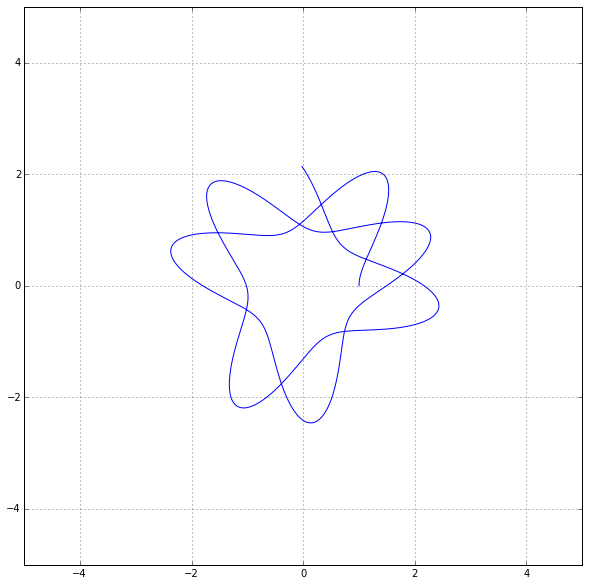

In [2]:
# y' = f(x,t)
def f(x, t, α):
    return [x[1], α * x[0] * x[3]**2 - 1, x[3], - 2 * x[3] * x[1] / x[0] ]


@interact(α = (.1,10,0.1), tmax=(0.01,100,0.1)) #Permite cambiar el parámetro de la ecuación
def solve(α = 2, tmax = 20):
    y0 = [1, 0, 0, 1]
    t0 = 0
    t = np.linspace(0, tmax, 1000)
    r = odeint(f, y0, t, args = (α,))
    plt.xlim((-5,5))
    plt.ylim((-5,5))
    plt.plot(r[:,0]*np.cos(r[:,2]), r[:,0]*np.sin(r[:,2]),'b-')
